CODE FOR PLAYING AROUND WITH THE SYNTHETIC KAGGLE DATA - "Startup Growth & Funding Trends"

Code Block #1 - API call from Kaggle for relevant data into a dataframe + needed imports

In [1]:
#Producing the API Call from Kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np  
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("samayashar/startup-growth-and-funding-trends")
#print("Path to dataset files:", path)

# Assuming the dataset contains a CSV file
import os

# Get the path to the first CSV file in the downloaded dataset
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files: #Key here -- if loaded successfully, df name is data
    csv_path = os.path.join(path, csv_files[0])
    # Load the CSV file into a pandas DataFrame
    data = pd.read_csv(csv_path)
    print("Data loaded successfully!") 
else:
    print("No CSV files found in the dataset.")

print(data.head()) #Prints the first 5 rows of the data

/Users/tomdavey/Documents/GitHub/MLProject1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data loaded successfully!
  Startup Name Industry  Funding Rounds  Funding Amount (M USD)  \
0    Startup_1      IoT               1                  101.09   
1    Startup_2   EdTech               1                  247.62   
2    Startup_3   EdTech               1                  109.24   
3    Startup_4   Gaming               5                   10.75   
4    Startup_5      IoT               4                  249.28   

   Valuation (M USD)  Revenue (M USD)  Employees  Market Share (%)  \
0             844.75            67.87       1468              5.20   
1            3310.83            75.65       3280              8.10   
2            1059.37            84.21       4933              2.61   
3             101.90            47.08       1059              2.53   
4             850.11            50.25       1905              4.09   

   Profitable  Year Founded         Region Exit Status  
0           0          2006         Europe     Private  
1           1          2003  South A

Code Block #2 - Data Cleaning and Exploratory Data Analysis

In [2]:
#Checking the Data and Cleaning where needed

def nan_checker(df):
    """
    Function to check whether NaN values are present. 
    Inputted argument is a dataframe and if Nan value - identifies column and row number
    If no NaN values are found, nothing will be outputted
    """
    for index, row in df.iterrows():
        for column in df.columns:
            if pd.isnull(row[column]):
                print(f"NaN value found at row {index}, column '{column}'")

nan_checker(data) #Check for NaN values in the data

#Exploratory Data Analysis

print(data.describe())

       Funding Rounds  Funding Amount (M USD)  Valuation (M USD)  \
count      500.000000              500.000000         500.000000   
mean         2.958000              152.656760        1371.809180   
std          1.440968               86.683711         978.226579   
min          1.000000                0.570000           2.430000   
25%          2.000000               79.212500         557.027500   
50%          3.000000              156.005000        1222.580000   
75%          4.000000              226.450000        2052.085000   
max          5.000000              299.810000        4357.490000   

       Revenue (M USD)    Employees  Market Share (%)  Profitable  \
count       500.000000   500.000000        500.000000  500.000000   
mean         49.321740  2532.092000          5.092940    0.432000   
std          29.267605  1385.434921          2.807646    0.495851   
min           0.120000    12.000000          0.100000    0.000000   
25%          22.802500  1382.750000       

    Startup Name  Funding Amount (M USD)  Valuation (M USD)
0      Startup_1                  101.09             844.75
1      Startup_2                  247.62            3310.83
2      Startup_3                  109.24            1059.37
3      Startup_4                   10.75             101.90
4      Startup_5                  249.28             850.11
..           ...                     ...                ...
495  Startup_496                  181.86            2378.65
496  Startup_497                  107.34            1394.58
497  Startup_498                  160.29             502.09
498  Startup_499                  234.65            2814.52
499  Startup_500                  211.76            2563.17

[500 rows x 3 columns]


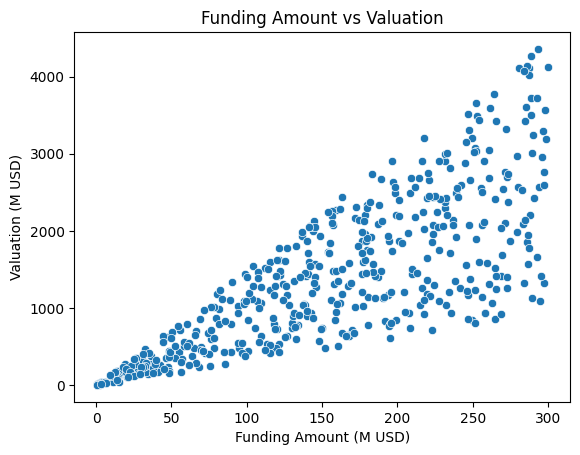

In [39]:
print(data.loc[:, ['Startup Name', 'Funding Amount (M USD)', 'Valuation (M USD)']]) 

#Visualising the data

sns.scatterplot(data=data, x='Funding Amount (M USD)', y='Valuation (M USD)')
plt.title('Funding Amount vs Valuation')
plt.xlabel('Funding Amount (M USD)')
plt.ylabel('Valuation (M USD)')
plt.show()
